#  🚀 Task 1 _ house price prediction
in this project i will try to predicte the prices of houses based on three features using linear regression :
### 1-  square footage:
-  square footage refers to the total area of usable living space within the house ,and include :
     - TotalBsmtSF (BsmtFinSF1 + BsmtFinSF2) - 1stFlrSF - 2ndFlrSF - GrLivArea 

### 2-  n of bedrooms:
 - number of bedrooms in whole house

### 3-  n of bathrooms:
 - number of bathrooms in whole house

In [1]:
# import opendatasets as od

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# file =('house-prices-advanced-regression-techniques/train.csv')
data = pd.read_csv('../data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'TotalBsmtSF' 'Bedroom' 'FullBath' 'HalfBath'

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data2=data[['1stFlrSF' ,'2ndFlrSF' ,'GrLivArea' ,'TotalBsmtSF' ,'BedroomAbvGr' ,'FullBath' ,'HalfBath' ,'SalePrice']]
data2.head()

,1stFlrSF,2ndFlrSF,GrLivArea,TotalBsmtSF,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,856,854,1710,856,3,2,1,208500
1,1262,0,1262,1262,3,2,0,181500
2,920,866,1786,920,3,2,1,223500
3,961,756,1717,756,3,1,0,140000
4,1145,1053,2198,1145,4,2,1,250000


In [7]:
data2.duplicated().sum()

2

In [8]:
data2.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
TotalBsmtSF     0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [9]:
data2.drop_duplicates()

,1stFlrSF,2ndFlrSF,GrLivArea,TotalBsmtSF,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,856,854,1710,856,3,2,1,208500
1,1262,0,1262,1262,3,2,0,181500
2,920,866,1786,920,3,2,1,223500
3,961,756,1717,756,3,1,0,140000
4,1145,1053,2198,1145,4,2,1,250000
...,...,...,...,...,...,...,...,...
1455,953,694,1647,953,3,2,1,175000
1456,2073,0,2073,1542,3,2,0,210000
1457,1188,1152,2340,1152,4,2,0,266500
1458,1078,0,1078,1078,2,1,0,142125


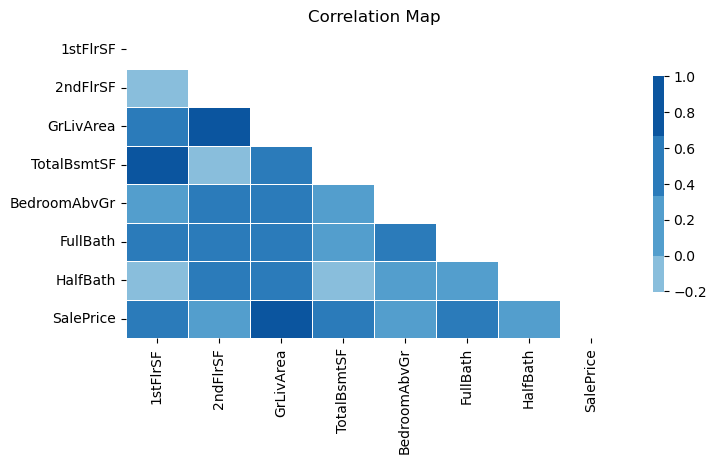

In [11]:
#correlation matrix
fig, axs = plt.subplots(figsize=(8, 4))
mat = data2.corr(method = 'pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, mask=mask, cmap = sns.color_palette('Blues'), vmax=1, center=0, annot = False, linewidths=.5, cbar_kws={'shrink': .7})
axs.set_title("Correlation Map")
plt.show()

In [12]:
data2.BedroomAbvGr.value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Scatter Relating SalePrice to LotArea')

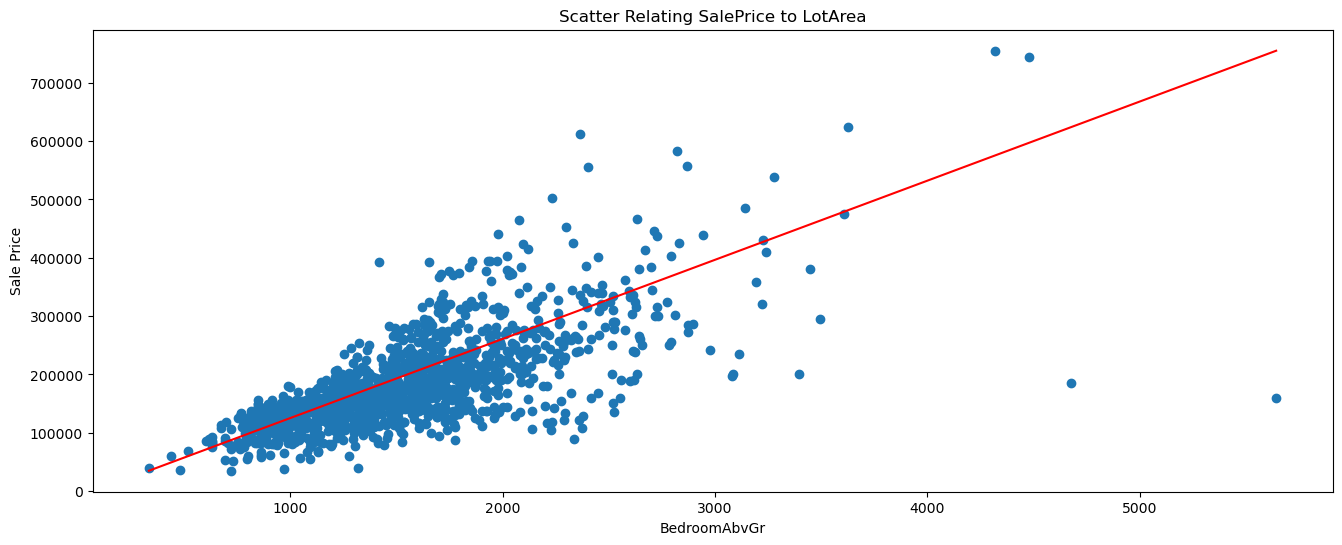

In [13]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data2.GrLivArea, y=data.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('BedroomAbvGr')
plt.plot([min(data2.GrLivArea), max(data2.GrLivArea)], [min(data.SalePrice), max(data.SalePrice)], color='red', linestyle='-')
plt.title('Scatter Relating SalePrice to LotArea')

Text(0.5, 1.0, 'Scatter Relating SalePrice to LotArea')

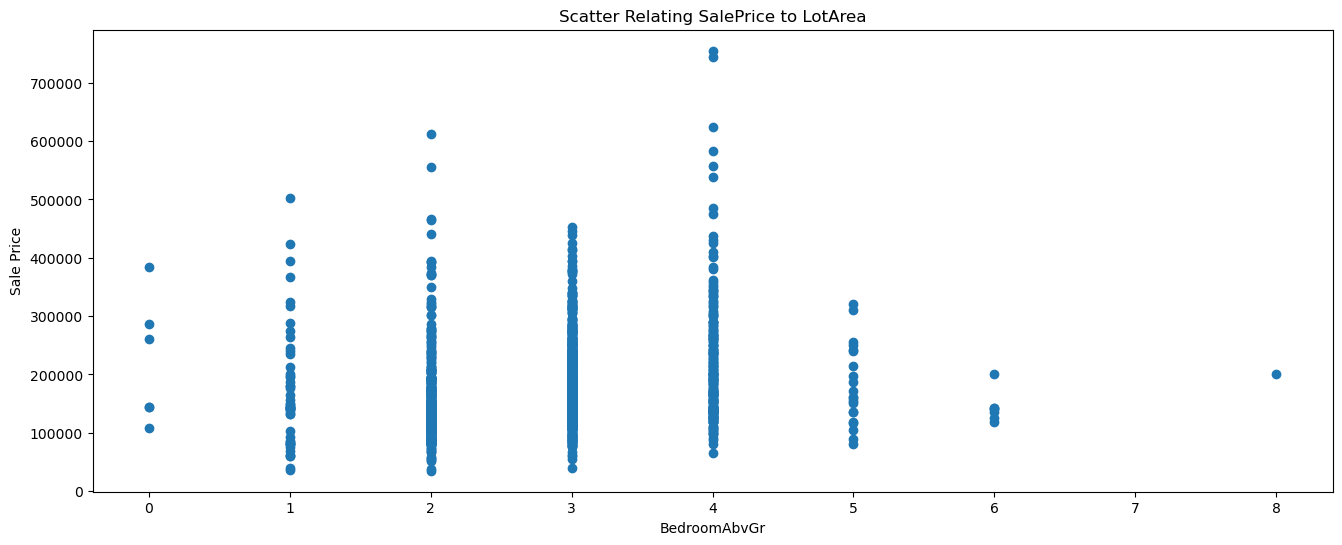

In [14]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data2.BedroomAbvGr, y=data.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('BedroomAbvGr')
plt.title('Scatter Relating SalePrice to LotArea')

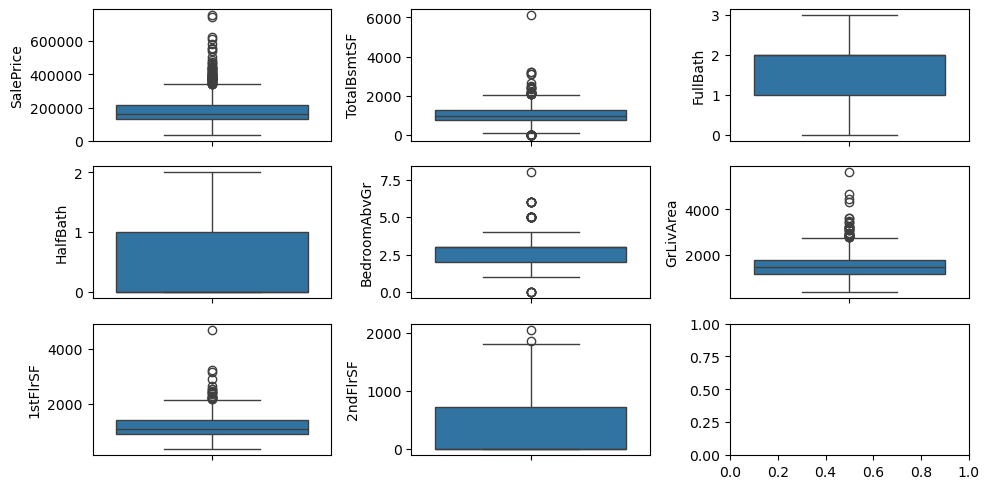

In [15]:
def detectOutliers():
    fig, axs = plt.subplots(3,3, figsize = (10,5))
    plt1 = sns.boxplot(data2['SalePrice'], ax = axs[0,0])
    plt2 = sns.boxplot(data2['TotalBsmtSF'], ax = axs[0,1])
    plt3 = sns.boxplot(data2['FullBath'], ax = axs[0,2])
    plt1 = sns.boxplot(data2['HalfBath'], ax = axs[1,0])
    plt2 = sns.boxplot(data2['BedroomAbvGr'], ax = axs[1,1])
    plt4 = sns.boxplot(data2['GrLivArea'], ax = axs[1,2])
    plt5 = sns.boxplot(data2['1stFlrSF'], ax = axs[2,0])
    plt6 = sns.boxplot(data2['2ndFlrSF'], ax = axs[2,1])
    
    
    plt.tight_layout()
detectOutliers()

In [10]:

for c in data2.columns:
    # Outlier reduction for area
    Q1 = data2[c].quantile(0.25)
    Q3 = data2[c].quantile(0.75)
    IQR = Q3 - Q1
    data2 = data2[(data2[c]>= Q1 - 0.5*IQR) & (data2[c]<= Q3 + 0.5*IQR)]

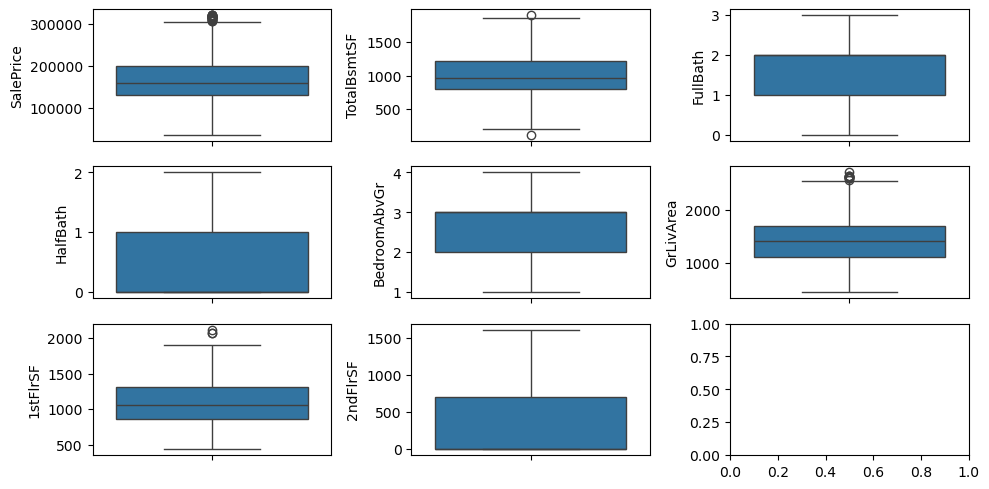

In [17]:
detectOutliers()

In [11]:
data2.dtypes

1stFlrSF        int64
2ndFlrSF        int64
GrLivArea       int64
TotalBsmtSF     int64
BedroomAbvGr    int64
FullBath        int64
HalfBath        int64
SalePrice       int64
dtype: object

In [12]:
data2['squareFootage'] = data2['1stFlrSF']+data2['2ndFlrSF']+data2['TotalBsmtSF']+data2['GrLivArea']

In [13]:
data2['Bathroom'] = data2['FullBath']+data2['HalfBath']

In [14]:
data2.drop(['1stFlrSF' , '2ndFlrSF' , 'GrLivArea' , 'TotalBsmtSF'],axis=1,inplace=True)

In [15]:
data2.drop(['FullBath' , 'HalfBath'],axis=1,inplace=True)

In [16]:
salesPrice= data2.pop('SalePrice')
data2.insert(3,'SalePrice',salesPrice)

In [17]:
data2.head()

,BedroomAbvGr,squareFootage,Bathroom,SalePrice
1,3,3786,2,181500
3,3,4190,1,140000
8,2,4500,2,129900
9,2,3145,1,118000
10,3,3120,1,129500


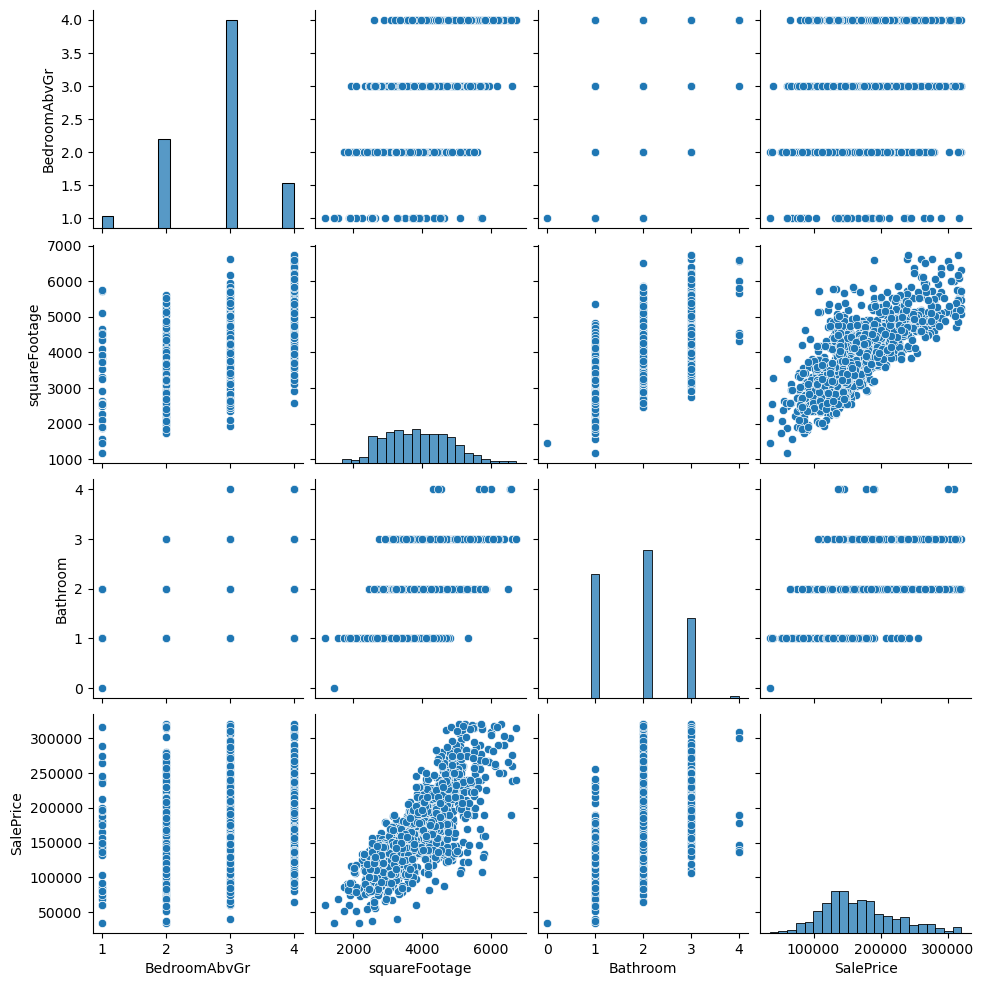

In [41]:
sns.pairplot(data2)

In [18]:
X = data2.drop('SalePrice',axis=1)
y = data2['SalePrice']

In [19]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaled_x = scaler.fit_transform(X)

scaled_x = pd.DataFrame(scaled_x) 

scaled_x.head()

,0,1,2
0,0.614433,0.584495,0.431621
1,0.614433,1.328072,-0.925218
2,-1.627516,1.898638,0.431621
3,-1.627516,-0.595289,-0.925218
4,0.614433,-0.641302,-0.925218


In [20]:
from sklearn.decomposition import PCA

pc=PCA(n_components=2)
flat_x=pc.fit_transform(scaled_x)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(flat_x,y,test_size=0.2, random_state=33)

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr_model.predict(X_test)

In [24]:
r2 = round(r2_score(y_test,y_pred),5)
print('Coefficient of determination R2: ', r2)

Coefficient of determination R2:  0.535


Text(0.5, 1.0, 'Scatter chart - Linear regression model')

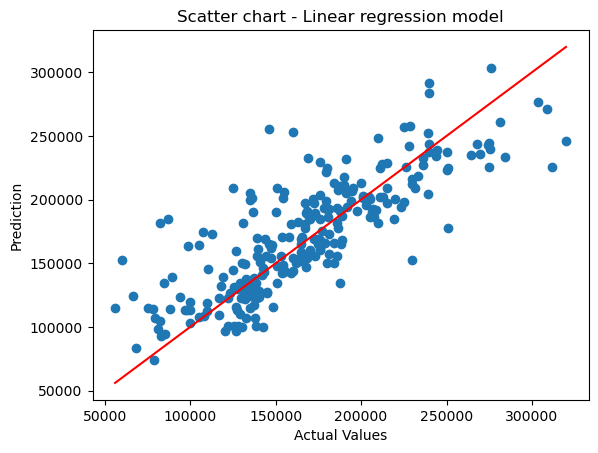

In [40]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')